In [402]:
using Pkg
Pkg.activate(dirname(dirname(pwd())))   # activate MyPackage
# Pkg.instantiate()
using Revise
using LMC
using CairoMakie

  Activating project at `~/Documents/Work/PostdocDonosti/Packages/LMC`


In [399]:
pdPID = 3238850
drudePID = 3285558
lmcPID = 3286797
ahePID = 3291639
spinPID = 3241713#3251898 #3241713


pdpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_data.jld"
pdpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_presets.jld"
drudepath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(drudePID)_merged_data.jld"
drudepresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(drudePID)_merged_presets.jld"
lmcpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(lmcPID)_merged_data.jld"
lmcpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(lmcPID)_merged_presets.jld"
spinpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(spinPID)_merged_data.jld"
spinpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(spinPID)_merged_presets.jld"


ahepath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(ahePID)_merged_data.jld"
ahepresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(ahePID)_merged_presets.jld"

"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/3291639_merged_presets.jld"

dim1: 500
dim2: 501
nalphas[1]: (501,)


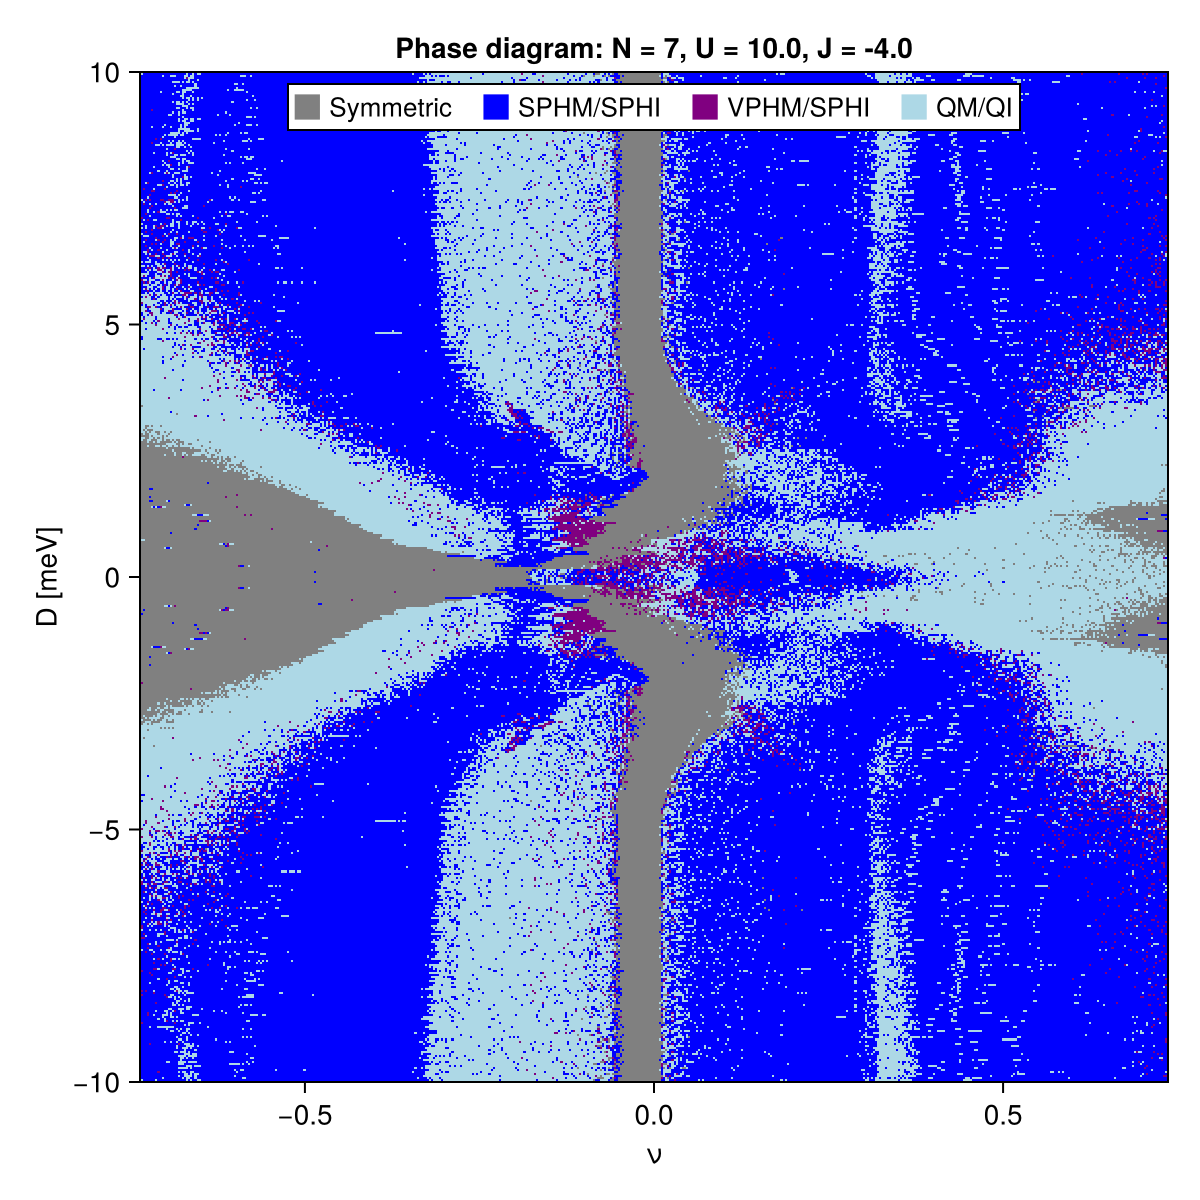

In [364]:
fig = plot_phasediagrams(pdpath, pdpresetpath)

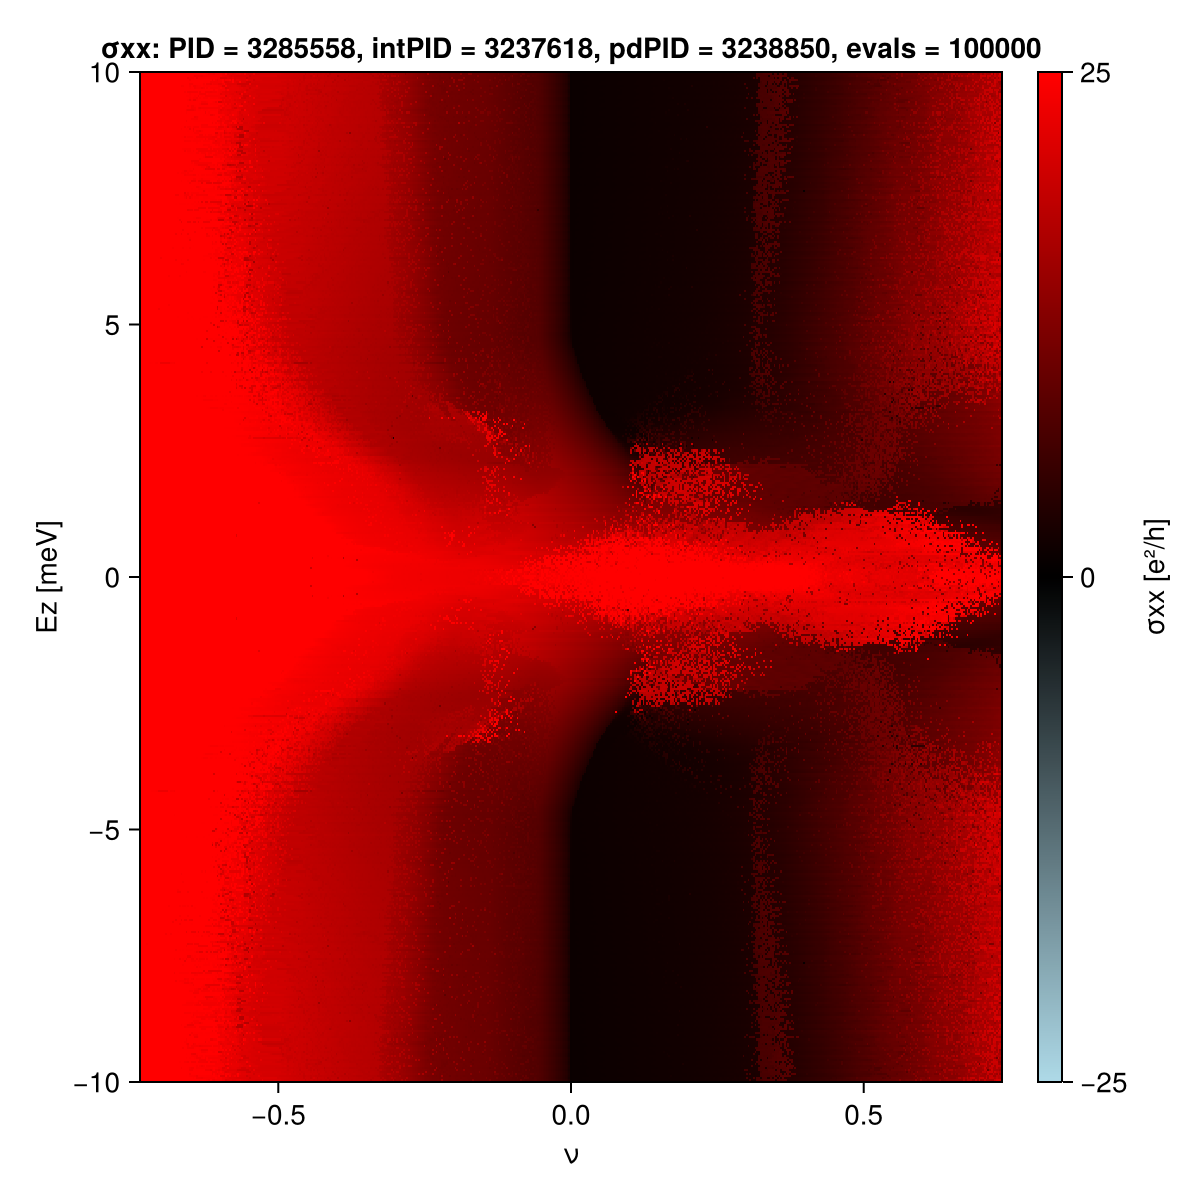

In [430]:
fig = plot_drude(drudepath, drudepresetpath, colorrange = [-25,25])

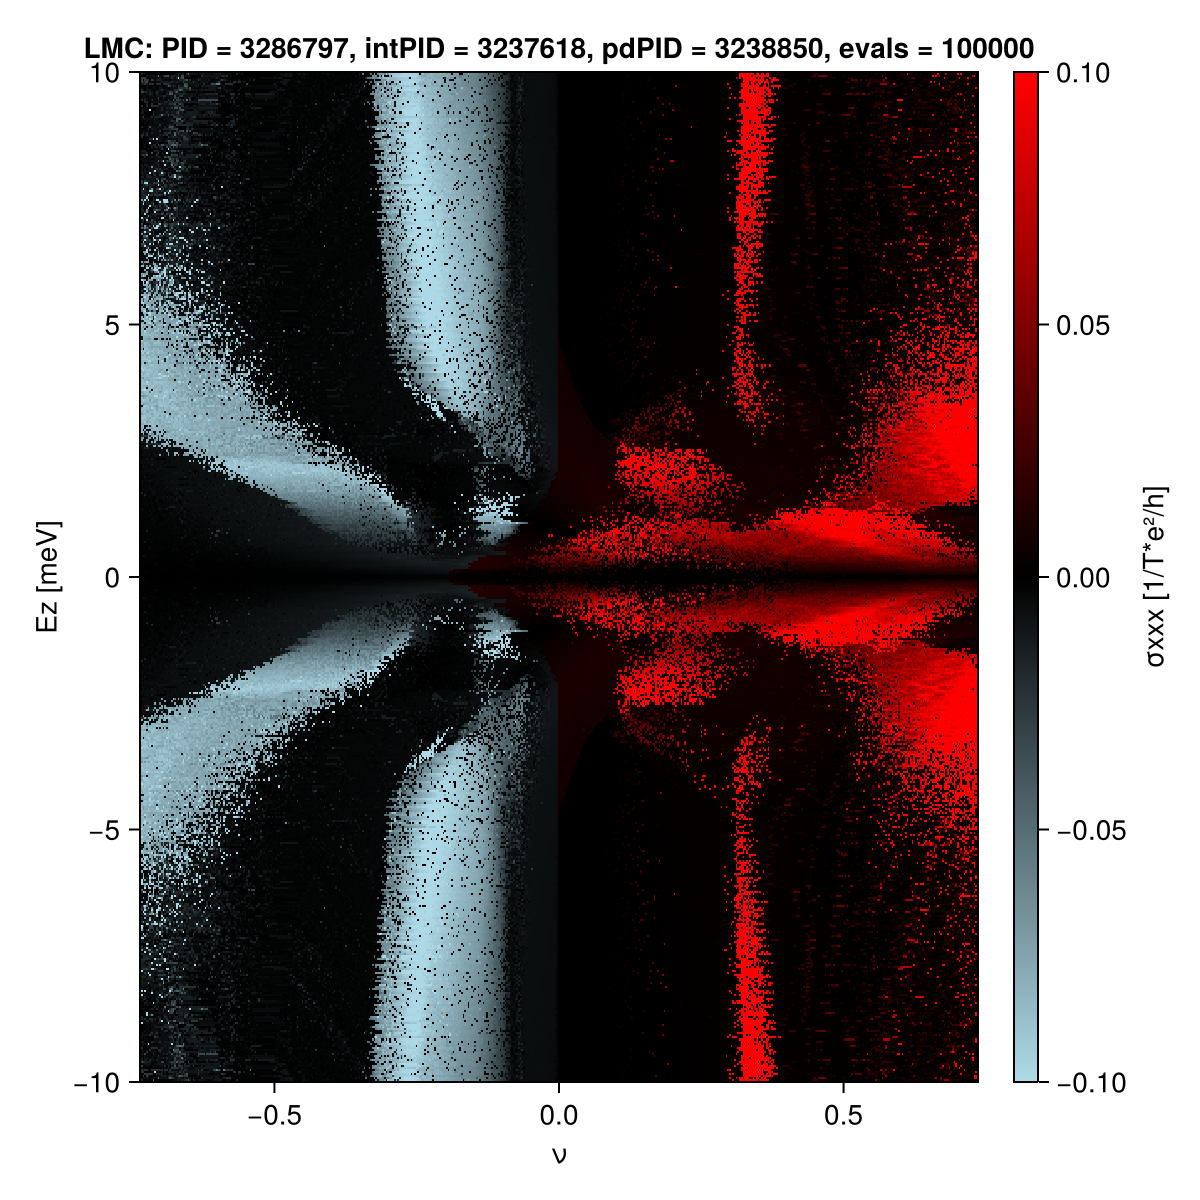

In [454]:
fig = plot_lmc(lmcpath, lmcpresetpath, colorrange = [-0.1,0.1])

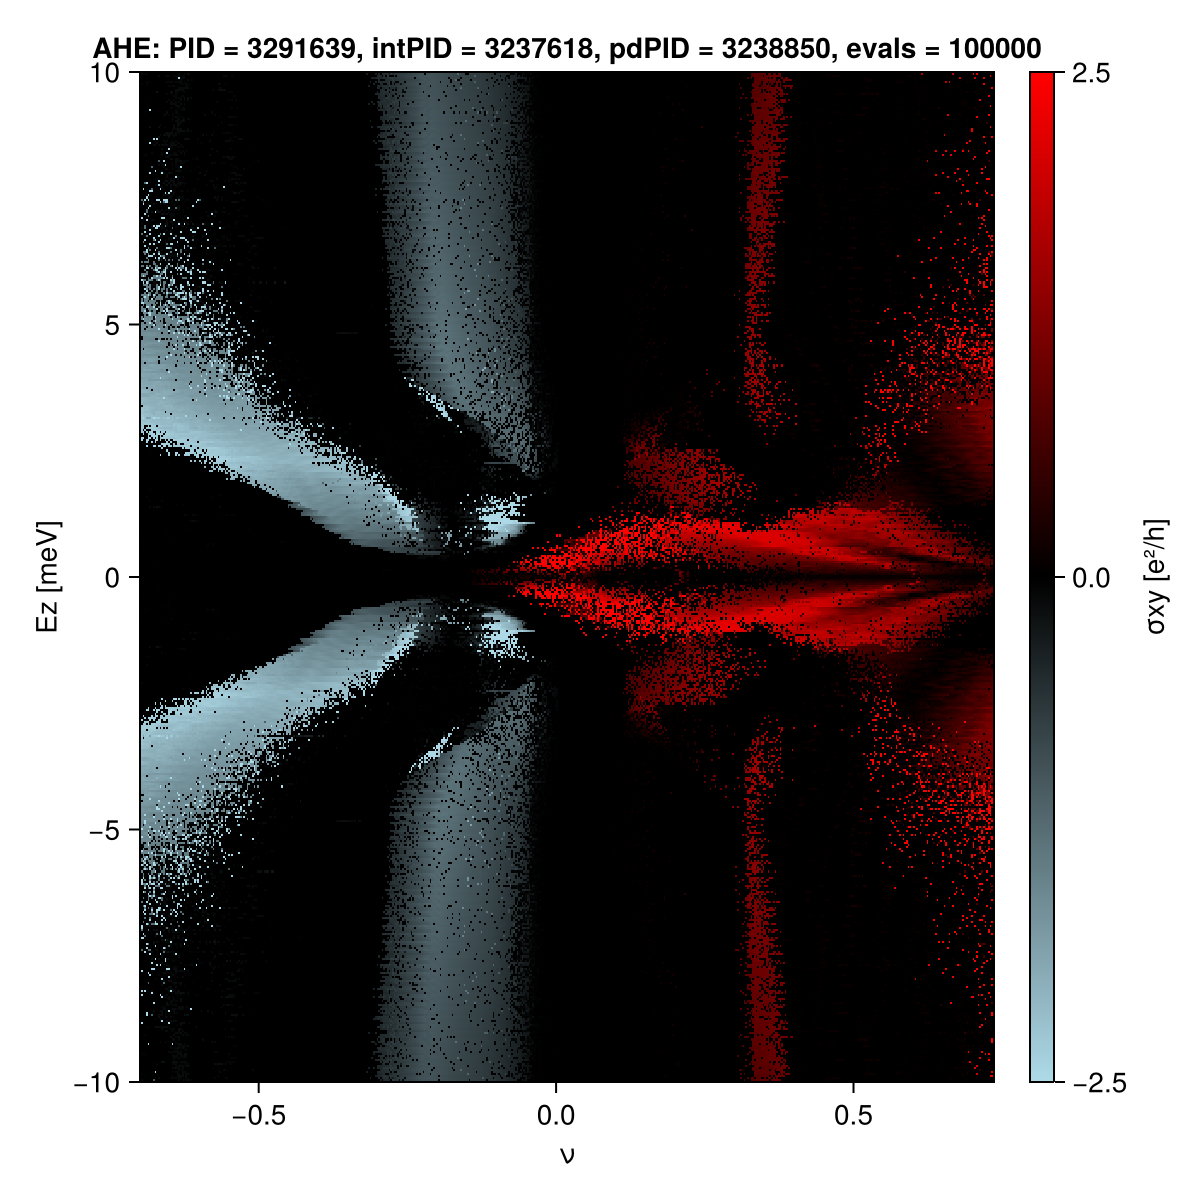

In [453]:
fig = plot_ahe(ahepath, ahepresetspath, colorrange = [-2.5,2.5])

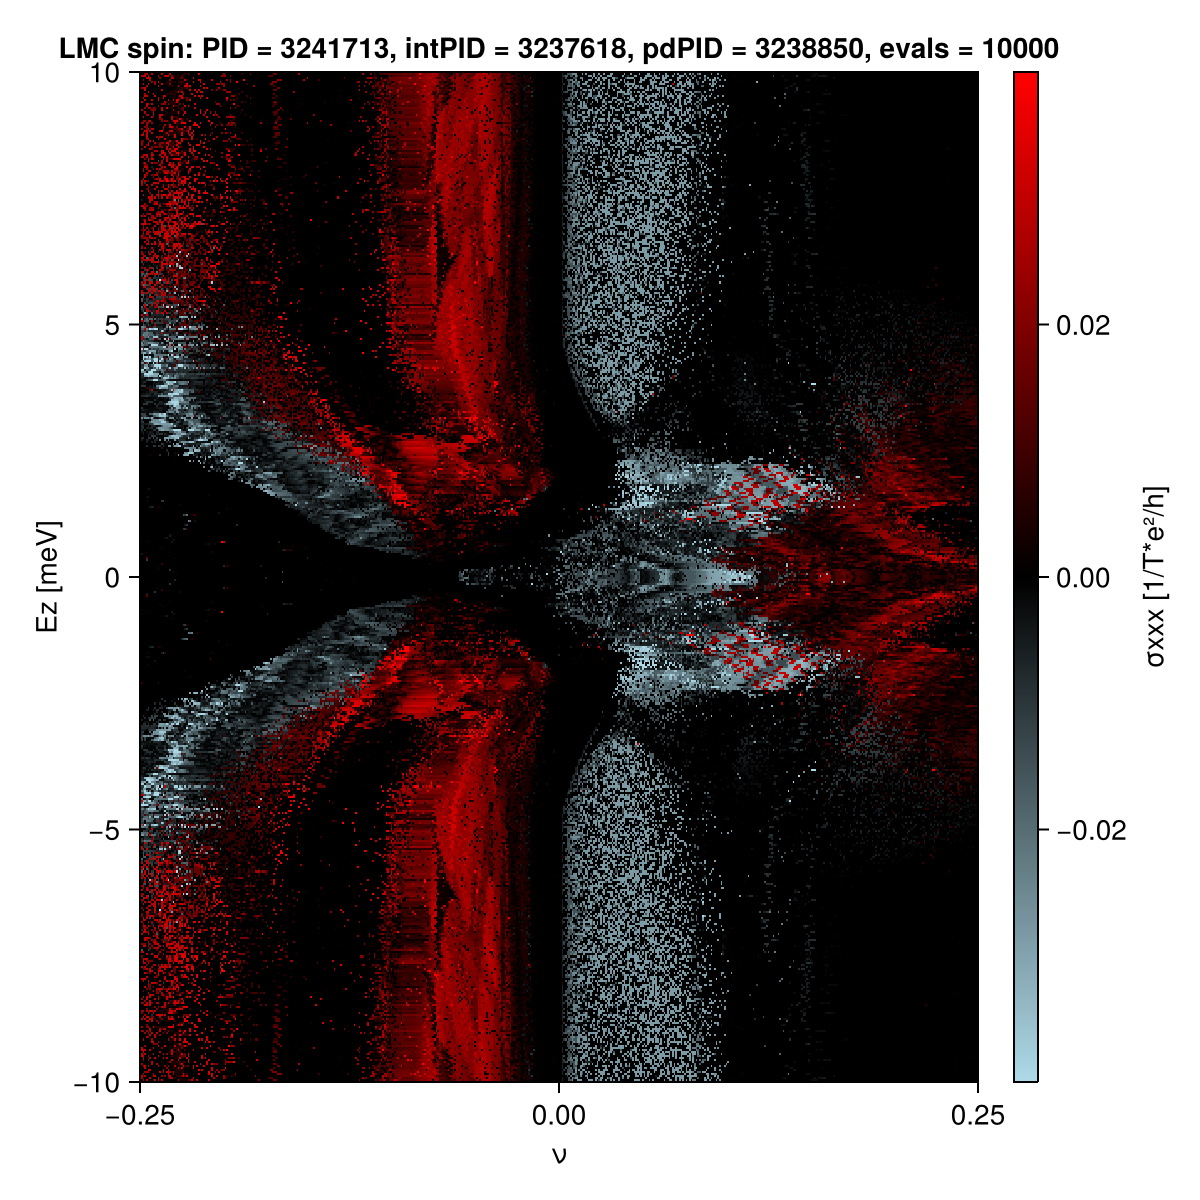

In [400]:
fig = plot_lmcspin(spinpath, spinpresetpath, colorrange = [-0.04,0.04])

In [ ]:
using JLD2
ppd = load(pdpresetpath)
pddata = load(pdpath)
vals, vals2 = ppd["presets"]
_, pdpresets = vals
_, first_value = first(pddata["merged"])
keylist = keys(first_value)
Ezs = []
muss = []
count = 1
for (path, d) in pddata["merged"]
    Ez = d["Ezs"][1]
    mus = d["mus"][1]
    push!(Ezs, Ez)
    push!(muss, mus)
end
νlist = first_value["nu_list"];

In [412]:
function aux_bands(νval, Ezval)

    idxnu = argmin(abs.(νlist .- νval))
    idxEz = argmin(abs.(Ezs .- Ezval))
    spinfull_plotbandsanddos(pdpresets.N, pdpresets.p, νlist[idxnu], 
    muss[idxEz][idxnu], Ezs[idxEz], collect(-10:0.1:10), points = 100, evals = 10)
end
    

aux_bands (generic function with 1 method)

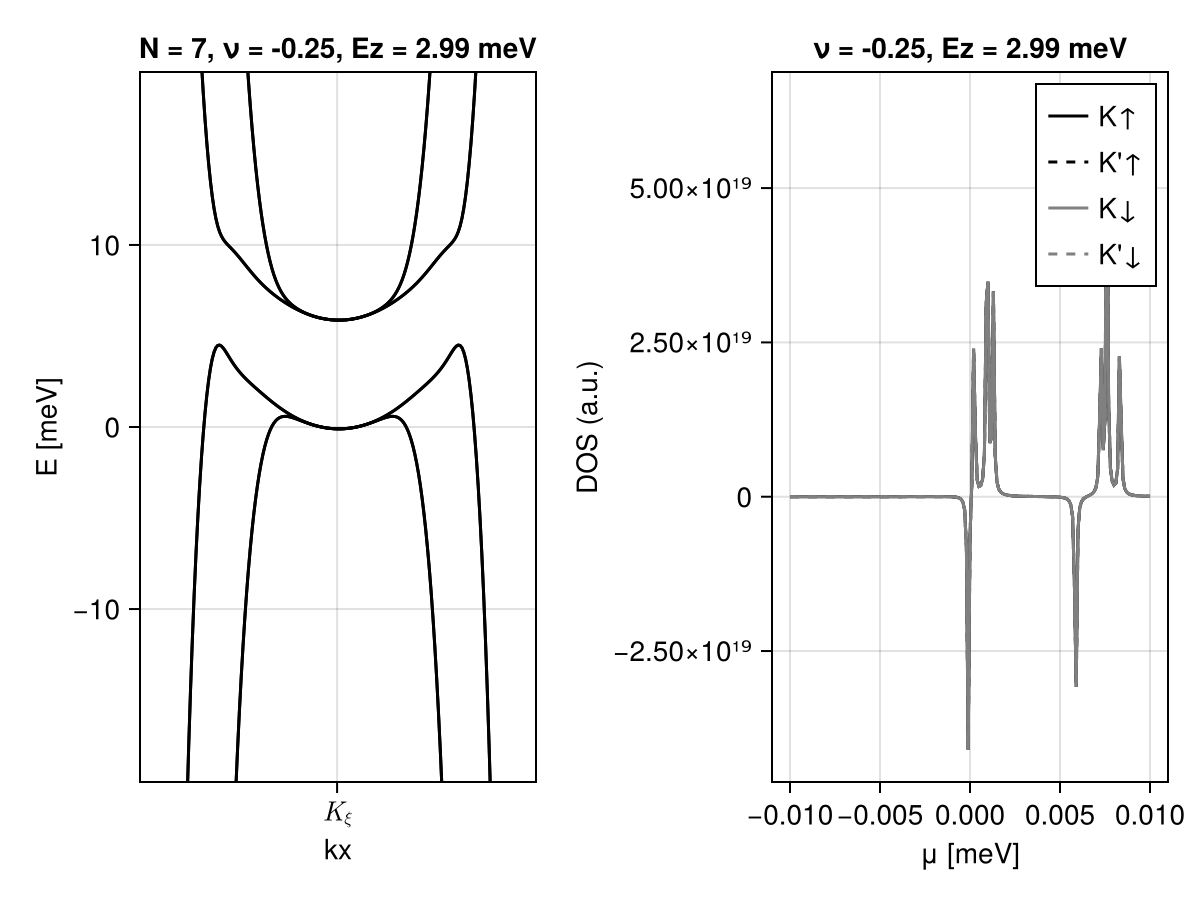

In [418]:
aux_bands(-0.25, 3)


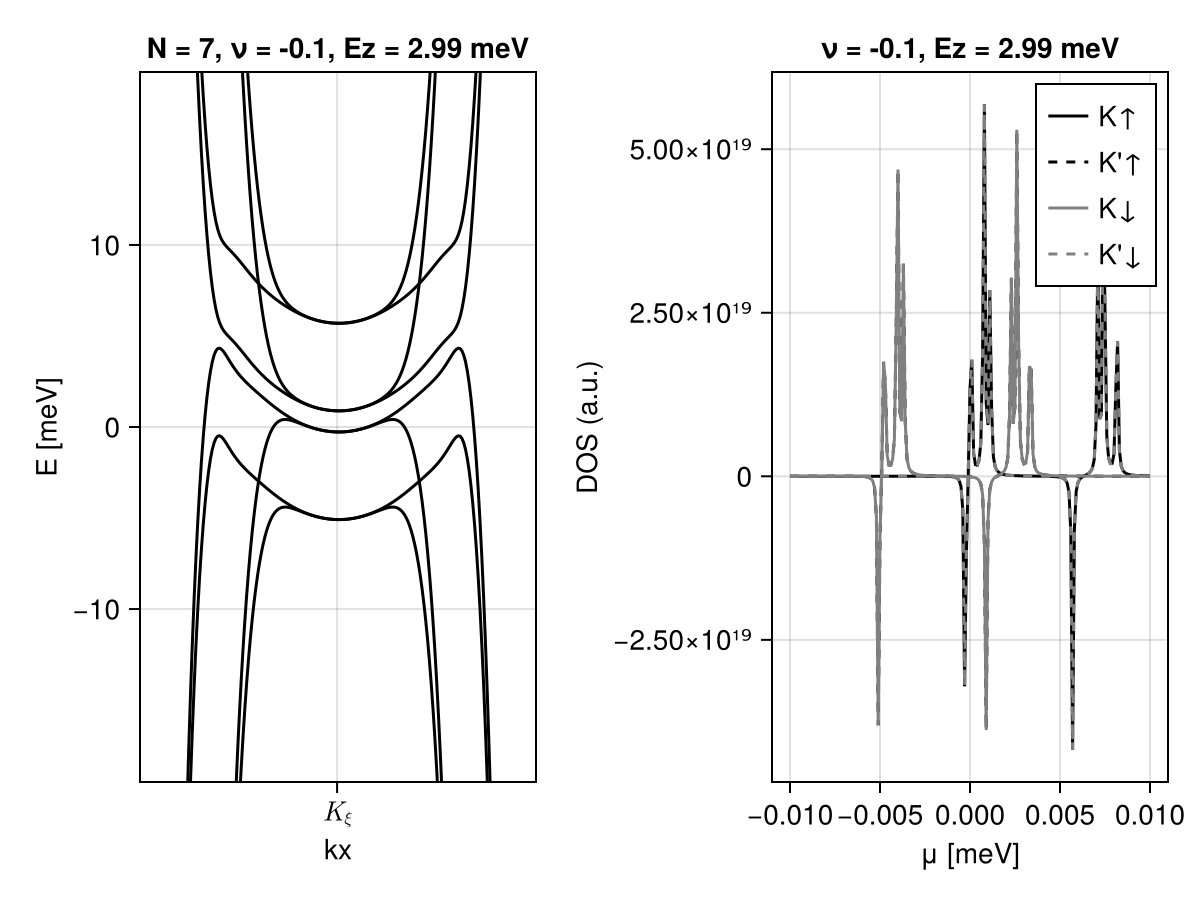

In [419]:
aux_bands(-0.1, 3)

## Plot

In [457]:

function lat_figure4(pdpath, pdpresetpath, lmcpath, lmcpresetpath, ahepath, ahepresetpath; fontsizetheme = 15)
    with_theme(merge(theme_latexfonts(), Theme(fontsize = fontsizetheme))) do #
        Figure4(pdpath, pdpresetpath, lmcpath, lmcpresetpath, ahepath, ahepresetpath, fontsize = fontsizetheme)   
    end
end

function Figure4(pdpath, pdpresetpath, lmcpath, lmcpresetpath, ahepath, ahepresetpath; fontsize = 8)
    fig = Figure(size = (600, 600))
    ga = fig[1:2,1] = GridLayout()
    ax1 = Axis(ga[1,1], xlabel = L"$\nu\text{ [}10^{12}\text{ cm}^{-2}\text{]}$", ylabel = L"$E_z \text{ [meV]}$", xlabelsize = fontsize +2, ylabelsize = fontsize +2)
    gb =fig[1,2] =  GridLayout()
    ax2 = Axis(gb[1,1], xlabel = L"$\nu\text{ [}10^{12}\text{ cm}^{-2}\text{]}$", ylabel = L"$E_z \text{ [meV]}$", xlabelsize = fontsize +2, ylabelsize = fontsize +2)
    ax3 = Axis(ga[2,1], xlabel = L"$\nu\text{ [}10^{12}\text{ cm}^{-2}\text{]}$", ylabel = L"$E_z \text{ [meV]}$", xlabelsize = fontsize +2, ylabelsize = fontsize +2)
    gd = fig[2,2] = GridLayout()
    ax4 = Axis(gd[1,1], xlabel = L"$\nu\text{ [}10^{12}\text{ cm}^{-2}\text{]}$", ylabel = L"$E_z \text{ [meV]}$", xlabelsize = fontsize +2, ylabelsize = fontsize +2)



    #_________________________________________
    plot_phasediagrams(ax1, pdpath, pdpresetpath; colorlist = missing, axisleg = false)
    ylims!(ax1, -10,10)
    ax1.xticks = ([-0.5,0,0.5])
    #_________________________________________
    hm = plot_drude(ax2, drudepath, drudepresetpath, colorrange = [0,25])
    cb = Colorbar(gb[1,2], hm, label = "σxx [e²/h]", vertical = true,  
    ticks = ([0,25], ["0", "25"]), labelpadding = -15)
    ylims!(ax2,-10,10)
    ax2.xticks = ([-0.5,0,0.5])

    #_________________________________________
    hm = plot_lmc(ax3, ahepath, ahepresetpath, colorrange = [-2, 2], absolute = true)
    cb = Colorbar(ga[2,2], hm, label = "|σxy| [e²/h]", vertical = true,  
    ticks = ([-2,0,2], ["-2","0","2"]), labelpadding = -15)
    ylims!(ax3,-10,10)
    # xlims!(ax3,-0.25,0.25)
    # ax3.xticks = ([-0.5,0,0.5])
    # xlims!(ax, -0.25,0.25)
    #_________________________________________
    hm = plot_lmc(ax4, lmcpath, lmcpresetpath, colorrange = [-0.1,0.1], absolute = true)
    cb = Colorbar(gd[1,2], hm, label = "|σxxx| [1/T e²/h]", labelsize = fontsize +1, vertical = true, labelpadding = -15,
        ticks = ([-0.1,0,0.1], ["-0.1","0","0.1"]), ticklabelpad = 2, ticklabelsize = fontsize, ticksize = 4)
    ylims!(ax4,-10,10)
    ax4.xticks = ([-0.5,0,0.5])

    scatter!(ax1, [NaN], [NaN], color = :gray, label = "Symmetric", marker = :rect, markersize = fontsize)
    scatter!(ax1, [NaN], [NaN], color = :blue, label = "SPHM", marker = :rect, markersize = fontsize)
    scatter!(ax1, [NaN], [NaN], color = :purple, label = "VPHM", marker = :rect, markersize = fontsize)
    scatter!(ax1, [NaN], [NaN], color = :lightblue, label = "QM", marker = :rect, markersize = fontsize)
    
    axislegend(ax1, position = :ct, orientation = :horizontal, labelsize = fontsize-3,
                titlesize = fontsize, patchlabelgap = 0, padding = (2,2,2,2), patchsize = (fontsize, fontsize), colgap = 3,
                margin = (0, 0, 6, 0) )

    colgap!(gb, 1)
    colgap!(ga, 1)
    colgap!(gd, 1)
#_______________________________________________________________________________________
#_________________________________________ LEGEND
# colorlist = [:purple, :gray, :blue, :lightblue]
# markers = [ MarkerElement(color = colorlist[2], marker = :rect, markersize = fontsize),
# MarkerElement(color = colorlist[4],   marker = :rect, markersize = fontsize), 
# MarkerElement(color = colorlist[3],   marker = :rect, markersize = fontsize) ,
# MarkerElement(color = colorlist[1],   marker = :rect, markersize = fontsize)]
    # labels = ["Symmetric", "QM/3QM", "SPHM", "VPHM"]

    # Legend(
    #     fig[0, 1:1],
    #     markers,
    #     labels,
    #     orientation = :horizontal,
    #     framevisible = true,
    #     labelsize = fontsize - 2,
    #     framesize = 0.5,
    #     fontsize = fontsize -2 ,
    #     framecolor = :black,
    #     padding = (0, 0, 1, 1),
    #     patchsize = (18, 18),
    #     colgap = 1,
    #     rowgap = -100, 
    #     patchlabelgap = 0,
    #     tellwidth = true
    # )
#_______________________________________________________________________________________

    hideydecorations!(ax2, grid = false)
    hideydecorations!(ax4, grid = false)
    hidexdecorations!(ax1, grid = false)
    hidexdecorations!(ax2, grid = false)
    colgap!(fig.layout, -5)
    Label(fig[1, 1, TopLeft()], "a)",
        fontsize = fontsize,
        padding = (0, 30, -10, 0),
        halign = :right)

    Label(fig[1, 2, TopLeft()], "b)",
    fontsize = fontsize,
    padding = (0, 5, -10, 0),
    halign = :right)

    Label(fig[2, 1, TopLeft()], "c)",
    fontsize = fontsize,
    padding = (0, 30, -30, 0),
    halign = :right)
    Label(fig[2, 2, TopLeft()], "d)",
    fontsize = fontsize,
    padding = (0, 5, -30, 0),
    halign = :right)
    fig
end

Figure4 (generic function with 4 methods)

dim1: 500
dim2: 501
nalphas[1]: (501,)


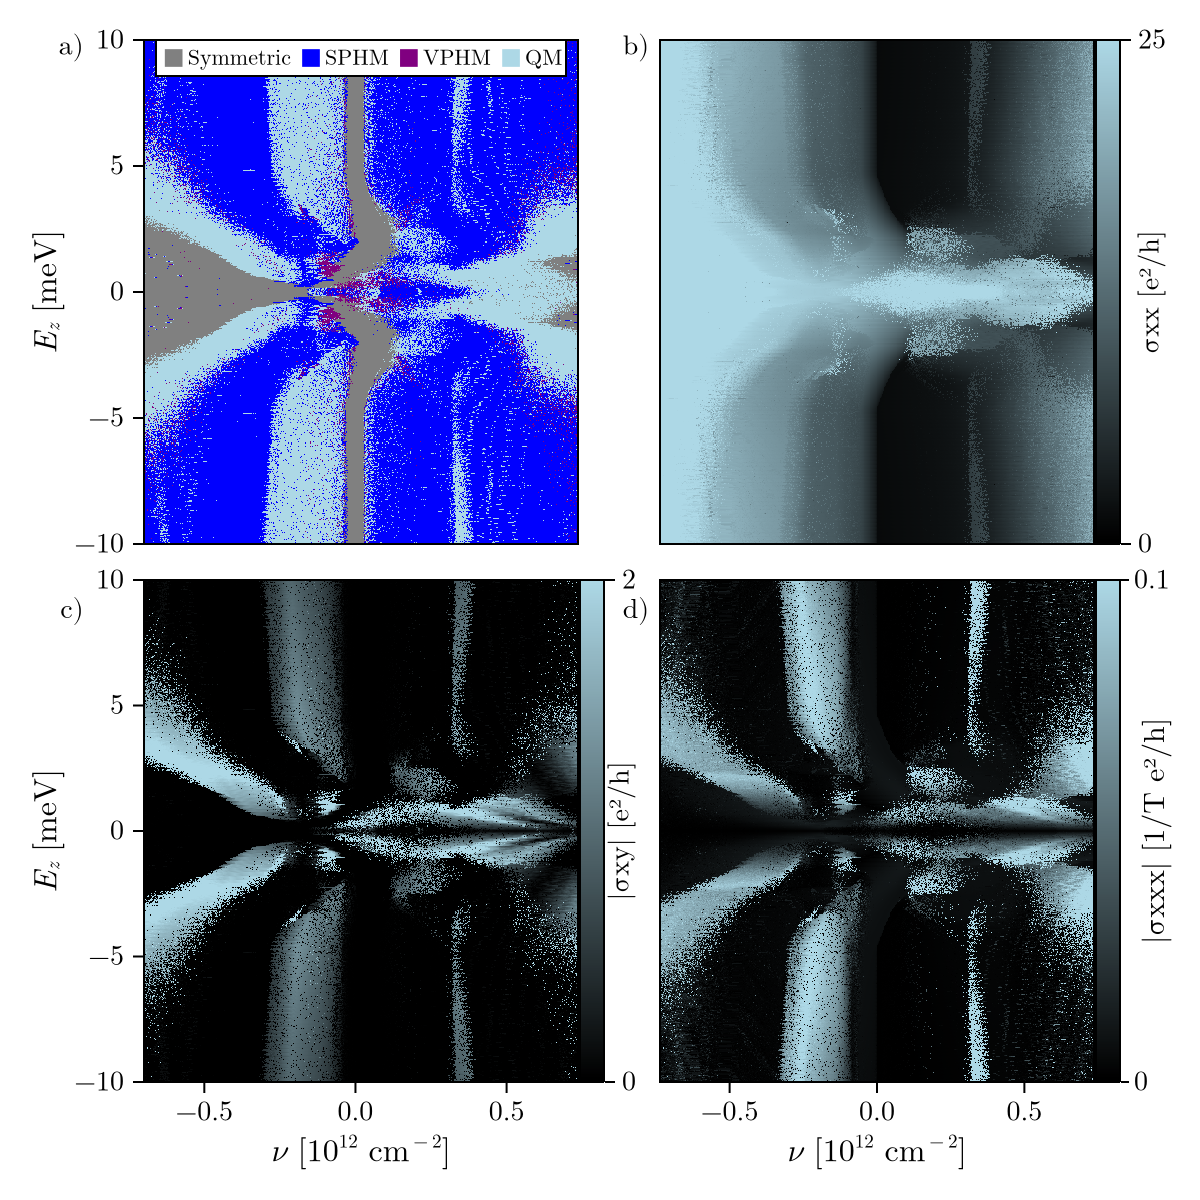

In [458]:
fig4 = lat_figure4(pdpath, pdpresetpath, lmcpath, lmcpresetpath, ahepath, ahepresetpath, fontsizetheme = 14)

In [459]:
v = "v2"
save("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/Figure4$(v).pdf", fig4)

CairoMakie.Screen{PDF}
